In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
reactions_df=pd.read_csv("Reactions.csv")
reactiontypes_df=pd.read_csv("ReactionTypes.csv")
content_df=pd.read_csv("Content.csv")

In [122]:
reactions_df.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [123]:
reactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [124]:
reactions_df.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [125]:
#dropping rows for which "type" values are missing
reactions_df1=reactions_df.dropna(axis=0,subset="Type")

In [126]:
reactions_df1.isnull().sum()

Unnamed: 0       0
Content ID       0
User ID       2039
Type             0
Datetime         0
dtype: int64

In [127]:
reactions_final=reactions_df1.drop(['Unnamed: 0','User ID'],axis=1)

In [128]:
reactions_final=reactions_final.rename(columns={'Type':'reaction_type'})

In [129]:
reactions_final.head()

,Content ID,reaction_type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [130]:
reactions_final['reaction_type'].value_counts()

heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: reaction_type, dtype: int64

In [131]:
content_df.head()

,Unnamed: 0,Content ID,User ID,Type,category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [132]:
content_df.isnull().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
category        0
URL           199
dtype: int64

In [133]:
content_final=content_df.drop(['Unnamed: 0','User ID','URL'],axis=1)

In [134]:
content_final.head()

,Content ID,Type,category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [135]:
content_final.Type.value_counts()

photo    261
video    259
GIF      244
audio    236
Name: Type, dtype: int64

In [136]:
content_final=content_final.rename(columns={'Type': 'content_type'})

In [137]:
content_final.head()

,Content ID,content_type,category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [138]:
content_final.category.value_counts()

technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: category, dtype: int64

In [139]:
reactiontypes_df.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [140]:
reactiontypes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [141]:
reactiontypes_df.isnull().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

In [142]:
reactiontypes_final=reactiontypes_df.drop(['Unnamed: 0'],axis=1)

In [143]:
reactiontypes_final.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [144]:
reactiontypes_final.Type.value_counts()

heart          1
want           1
disgust        1
hate           1
interested     1
indifferent    1
love           1
super love     1
cherish        1
adore          1
like           1
dislike        1
intrigued      1
peeking        1
scared         1
worried        1
Name: Type, dtype: int64

In [145]:
reactiontypes_final.Sentiment.value_counts()

positive    9
negative    5
neutral     2
Name: Sentiment, dtype: int64

In [146]:
#merging the tables
df1=pd.merge(reactions_final,content_final,how='left')
df1.head()

,Content ID,reaction_type,Datetime,content_type,category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying


In [147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   reaction_type  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   content_type   24573 non-null  object
 4   category       24573 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


In [148]:
df2=pd.merge(df1,reactiontypes_final,how='left',left_on='reaction_type',right_on='Type')

In [149]:
finaldf=df2.drop(['Type'],axis=1)

In [150]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Content ID     24573 non-null  object
 1   reaction_type  24573 non-null  object
 2   Datetime       24573 non-null  object
 3   content_type   24573 non-null  object
 4   category       24573 non-null  object
 5   Sentiment      24573 non-null  object
 6   Score          24573 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


In [151]:
finaldf.isnull().sum()

Content ID       0
reaction_type    0
Datetime         0
content_type     0
category         0
Sentiment        0
Score            0
dtype: int64

In [152]:
finaldf.category.value_counts()

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: category, dtype: int64

In [153]:
from datetime import date, time, datetime

finaldf['Datetime'] =pd.to_datetime(finaldf['Datetime'])

In [154]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   reaction_type  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
 3   content_type   24573 non-null  object        
 4   category       24573 non-null  object        
 5   Sentiment      24573 non-null  object        
 6   Score          24573 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.5+ MB


In [155]:
finaldf.to_csv('finaldf.csv')

In [156]:
categories=finaldf.groupby('category').apply(lambda x: (x['Score']).sum()).reset_index().rename(columns={0:'score_sum'})

In [157]:
categories 

,category,score_sum
0,animals,74965
1,cooking,64756
2,culture,66579
3,dogs,52511
4,education,57436
5,fitness,55323
6,food,66676
7,healthy eating,69339
8,public speaking,49264
9,science,71168


In [158]:
sorted_df=categories.sort_values(by='score_sum',ascending=False)

In [159]:
sorted_df

,category,score_sum
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676
2,culture,66579
14,travel,64880
1,cooking,64756
10,soccer,57783
4,education,57436


In [160]:
#getting the top 5 categories
top_five=sorted_df.head(5)

In [161]:
top_five

,category,score_sum
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676


In [162]:
top_five.to_csv('top5.csv')

<BarContainer object of 5 artists>

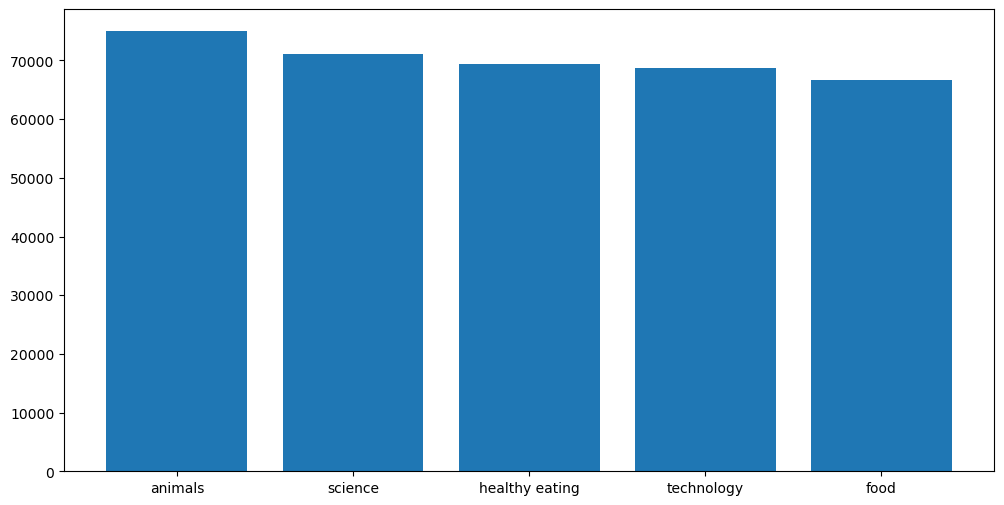

In [163]:
plt.bar(top_five['category'],top_five['score_sum']) 

In [164]:
finaldf.head()

,Content ID,reaction_type,Datetime,content_type,category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,positive,30


In [165]:
#reaction types for the most popular category i.e., animals
reaction_animals=finaldf[finaldf['category']=='animals'].groupby('reaction_type').size().reset_index().rename(columns={0:'reactions_count'})

In [166]:
sorted_reaction_animals=reaction_animals.sort_values(by='reactions_count',ascending=False)

In [167]:
sorted_reaction_animals

,reaction_type,reactions_count
12,scared,132
11,peeking,129
4,hate,128
1,cherish,125
13,super love,123
2,disgust,122
14,want,122
15,worried,121
5,heart,120
10,love,119


In [268]:
sorted_reaction_animals['reactions_count'].sum()

1897

<AxesSubplot:xlabel='reaction_type', ylabel='reactions_count'>

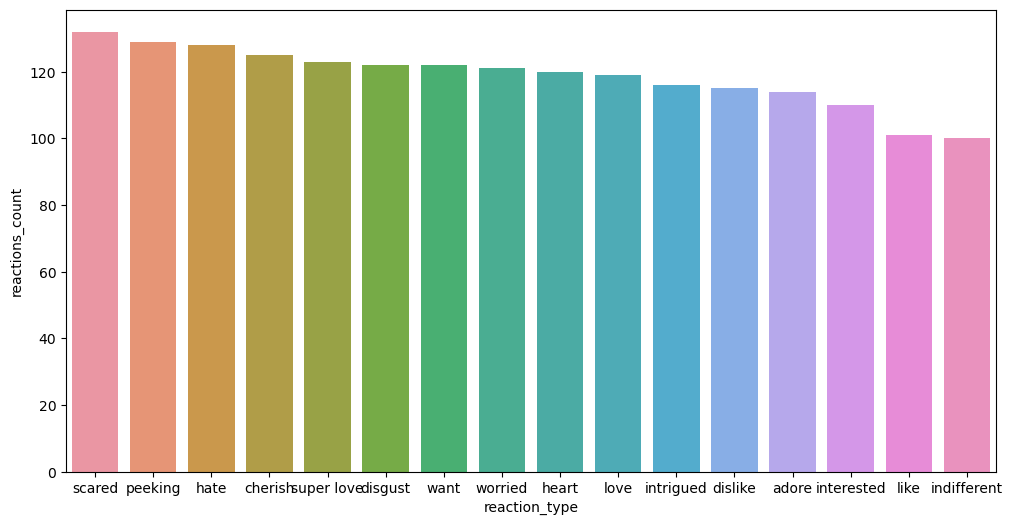

In [168]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="reaction_type",y="reactions_count",data=sorted_reaction_animals)

In [169]:
finaldf.head(5)

,Content ID,reaction_type,Datetime,content_type,category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,positive,30


In [170]:
finaldf['Year'] = finaldf['Datetime'].dt.year

In [171]:
finaldf.head()

,Content ID,reaction_type,Datetime,content_type,category,Sentiment,Score,Year
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0,2020
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,negative,10,2021
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,negative,15,2021
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0,2021
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,positive,30,2020


In [177]:
finaldf['Month'] = finaldf['Datetime'].dt.month_name(locale = 'English')

In [173]:
finaldf['Day'] = finaldf['Datetime'].dt.day

In [174]:
finaldf['Hour']=finaldf['Datetime'].dt.hour

In [178]:
finaldf.head()

,Content ID,reaction_type,Datetime,content_type,category,Sentiment,Score,Year,Month,Day,Hour
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0,2020,November,7,9
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,negative,10,2021,June,17,12
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,negative,15,2021,April,18,5
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0,2021,January,6,19
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,positive,30,2020,August,23,12


In [251]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   reaction_type  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
 3   content_type   24573 non-null  object        
 4   category       24573 non-null  object        
 5   Sentiment      24573 non-null  object        
 6   Score          24573 non-null  int64         
 7   Year           24573 non-null  int64         
 8   Month          24573 non-null  object        
 9   Day            24573 non-null  int64         
 10  Hour           24573 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 2.8+ MB


In [263]:
month_count21=finaldf[finaldf['Year']==2021].Month.value_counts().reset_index().rename(columns={'Month':'content_count','index':'month'})
month_count21

,month,content_count
0,May,2138
1,January,2126
2,March,2012
3,April,1974
4,February,1914
5,June,1129


In [264]:
month_count20=finaldf[finaldf['Year']==2020].Month.value_counts().reset_index().rename(columns={'Month':'content_count','index':'month'})
month_count20

,month,content_count
0,August,2114
1,December,2092
2,July,2070
3,October,2056
4,November,2034
5,September,2022
6,June,892


<AxesSubplot:xlabel='month', ylabel='content_count'>

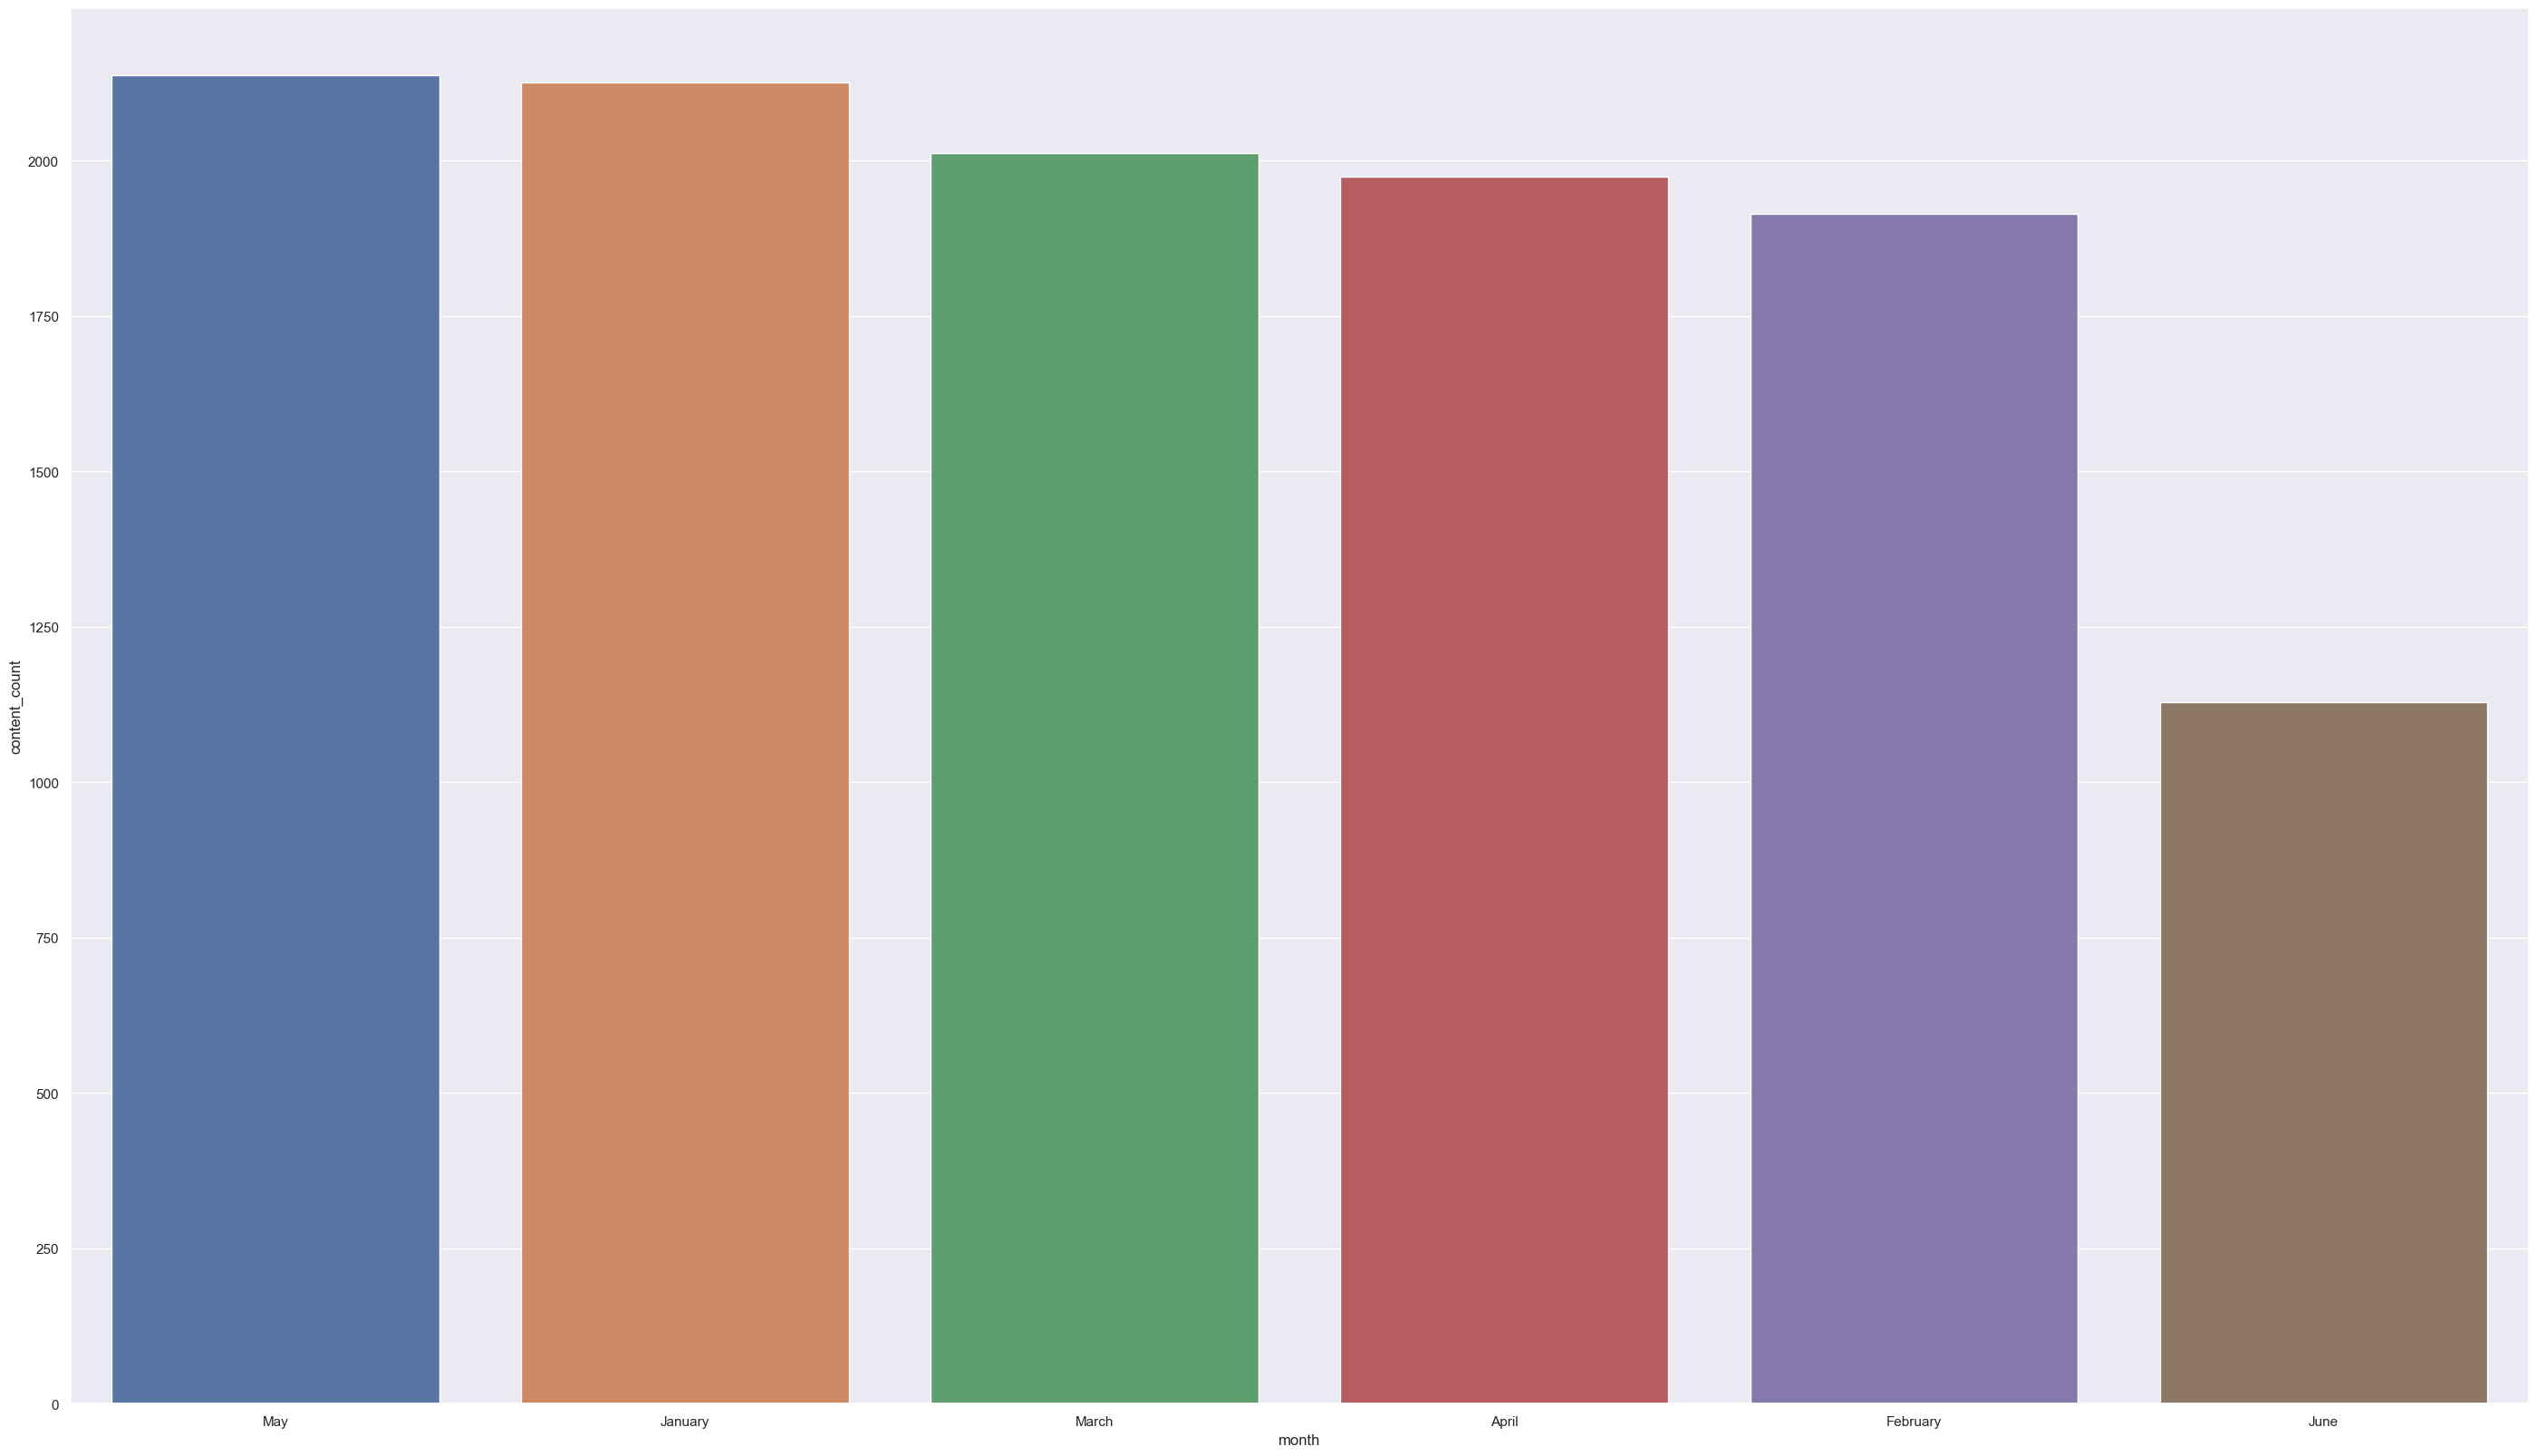

In [265]:
sns.barplot(x='month',y='content_count',data=month_count21.sort_values(by='content_count',ascending=False))

<AxesSubplot:xlabel='month', ylabel='content_count'>

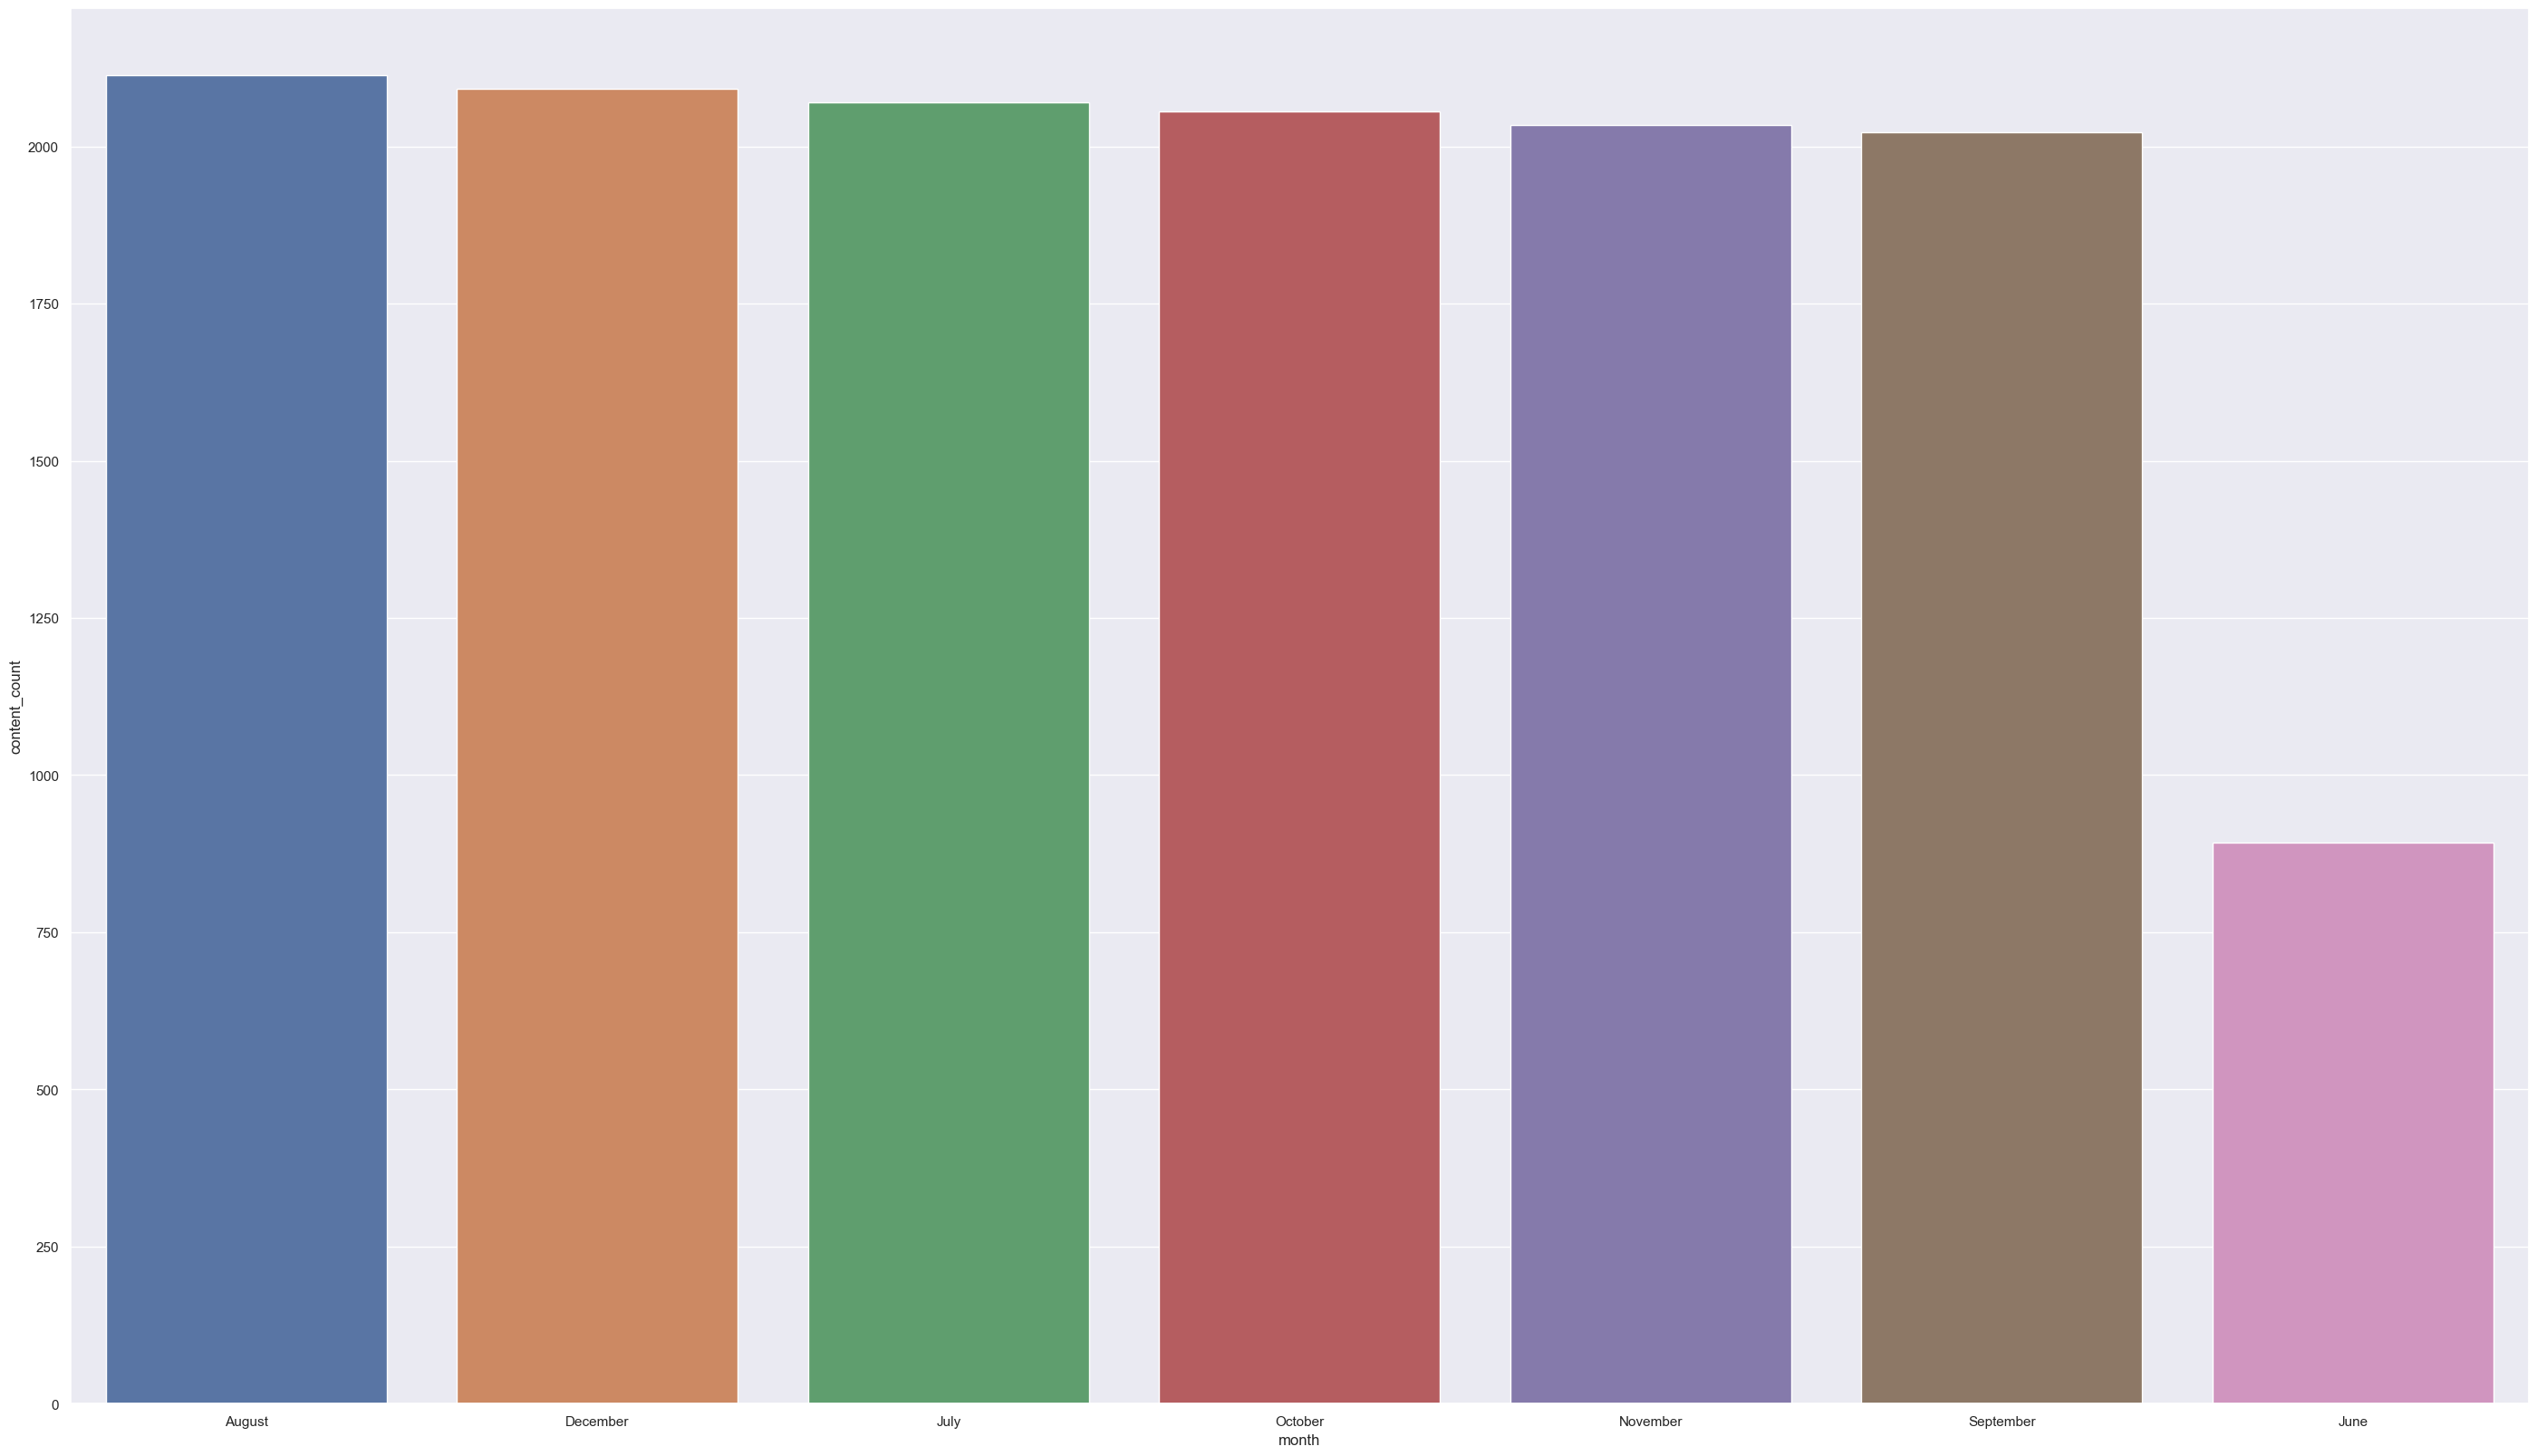

In [267]:
sns.barplot(x='month',y='content_count',data=month_count20.sort_values(by='content_count',ascending=False))

In [249]:
monthyear=finaldf[['Month','Year']].groupby(['Month','Year']).size().reset_index().rename(columns={0:'content_count'})
monthyear.sort_values(by=['Month'])

,Month,Year,content_count
0,April,2021,1974
1,August,2020,2114
2,December,2020,2092
3,February,2021,1914
4,January,2021,2126
5,July,2020,2070
6,June,2020,892
7,June,2021,1129
8,March,2021,2012
9,May,2021,2138


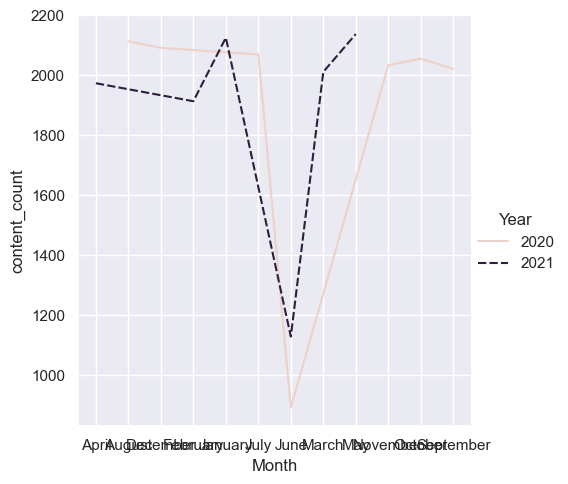

In [243]:
sns.set(rc={"figure.figsize":(35, 20)})
sns.relplot(
    data=monthyear,
    x="Month", y="content_count",
    hue="Year", style="Year",kind="line")

In [210]:
finaldf.content_type.value_counts()

photo    6589
video    6245
GIF      6079
audio    5660
Name: content_type, dtype: int64

In [211]:
content_names=finaldf.content_type.value_counts().index
content_values=finaldf.content_type.value_counts().values

([<matplotlib.patches.Wedge at 0x1daf00e6cd0>,
 [Text(0.7322525078153106, 0.8208570306686718, 'photo'),
  Text(-0.8700602130319681, 0.6730492000580391, 'video'),
  Text(-0.6688701525287134, -0.8732770001873494, 'GIF'),
  Text(0.8243582546368349, -0.7283086351349347, 'audio')],
 [Text(0.3994104588083512, 0.4477401985465482, '26.81%'),
  Text(-0.4745782980174371, 0.36711774548620313, '25.41%'),
  Text(-0.36483826501566186, -0.4763329091930996, '24.74%'),
  Text(0.4496499570746372, -0.39725925552814617, '23.03%')])

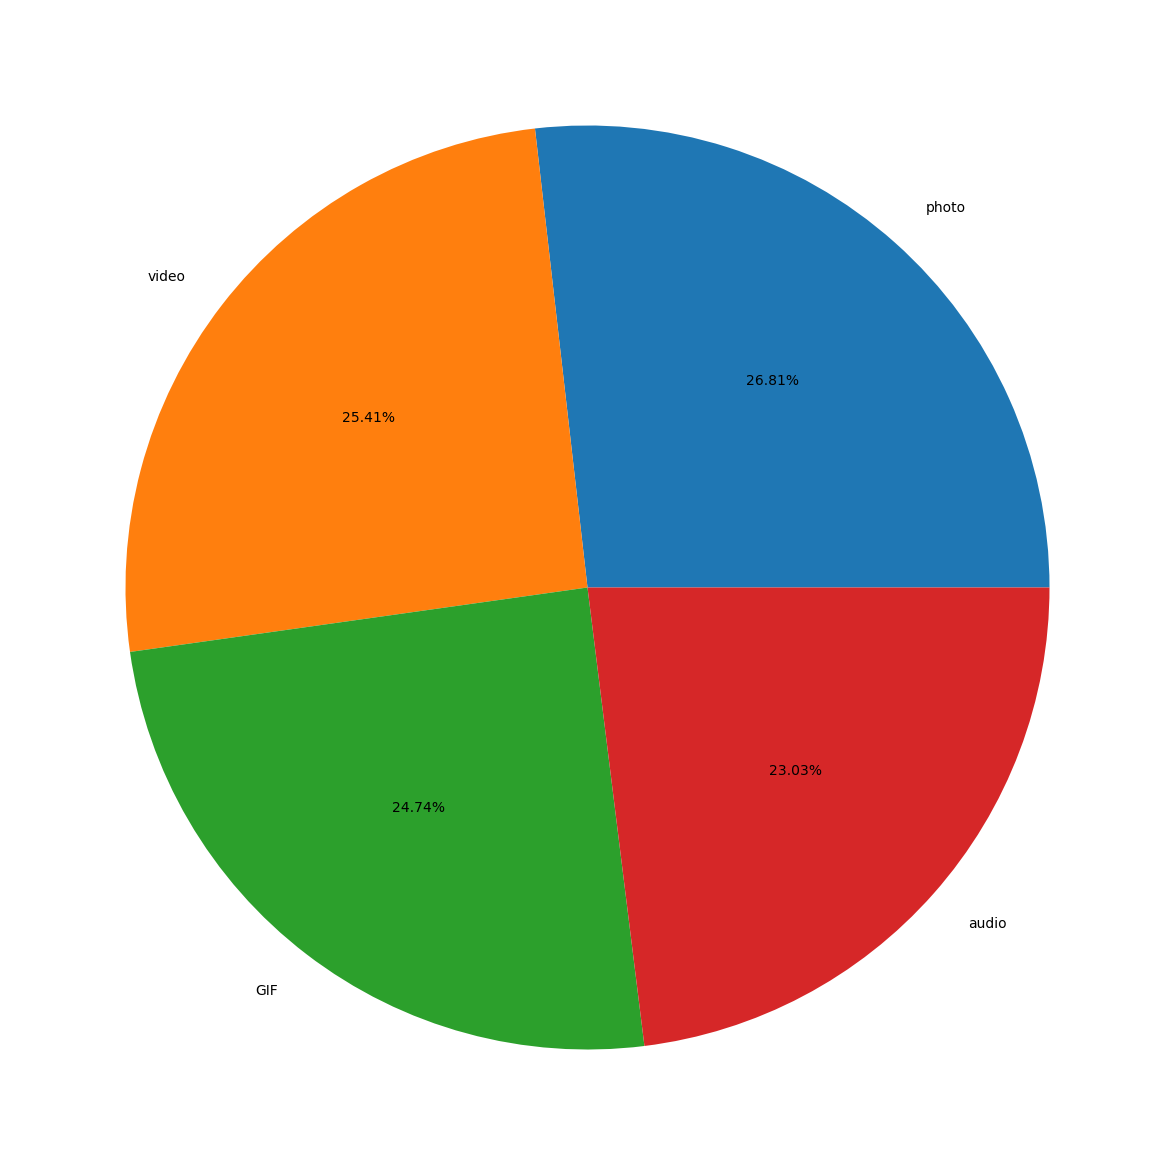

In [212]:
plt.figure(figsize=(15,15))
plt.pie(content_values,labels=content_names,autopct='%1.2f%%')

In [216]:
crosstab=pd.crosstab(index=finaldf['content_type'], columns=finaldf['Sentiment'])
crosstab #a crosstab needs to be created in order to get the values required for a mosaic plot. 

Sentiment,negative,neutral,positive
content_type,,,
GIF,1924,774,3381
audio,1771,673,3216
photo,2057,832,3700
video,1943,792,3510


In [214]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

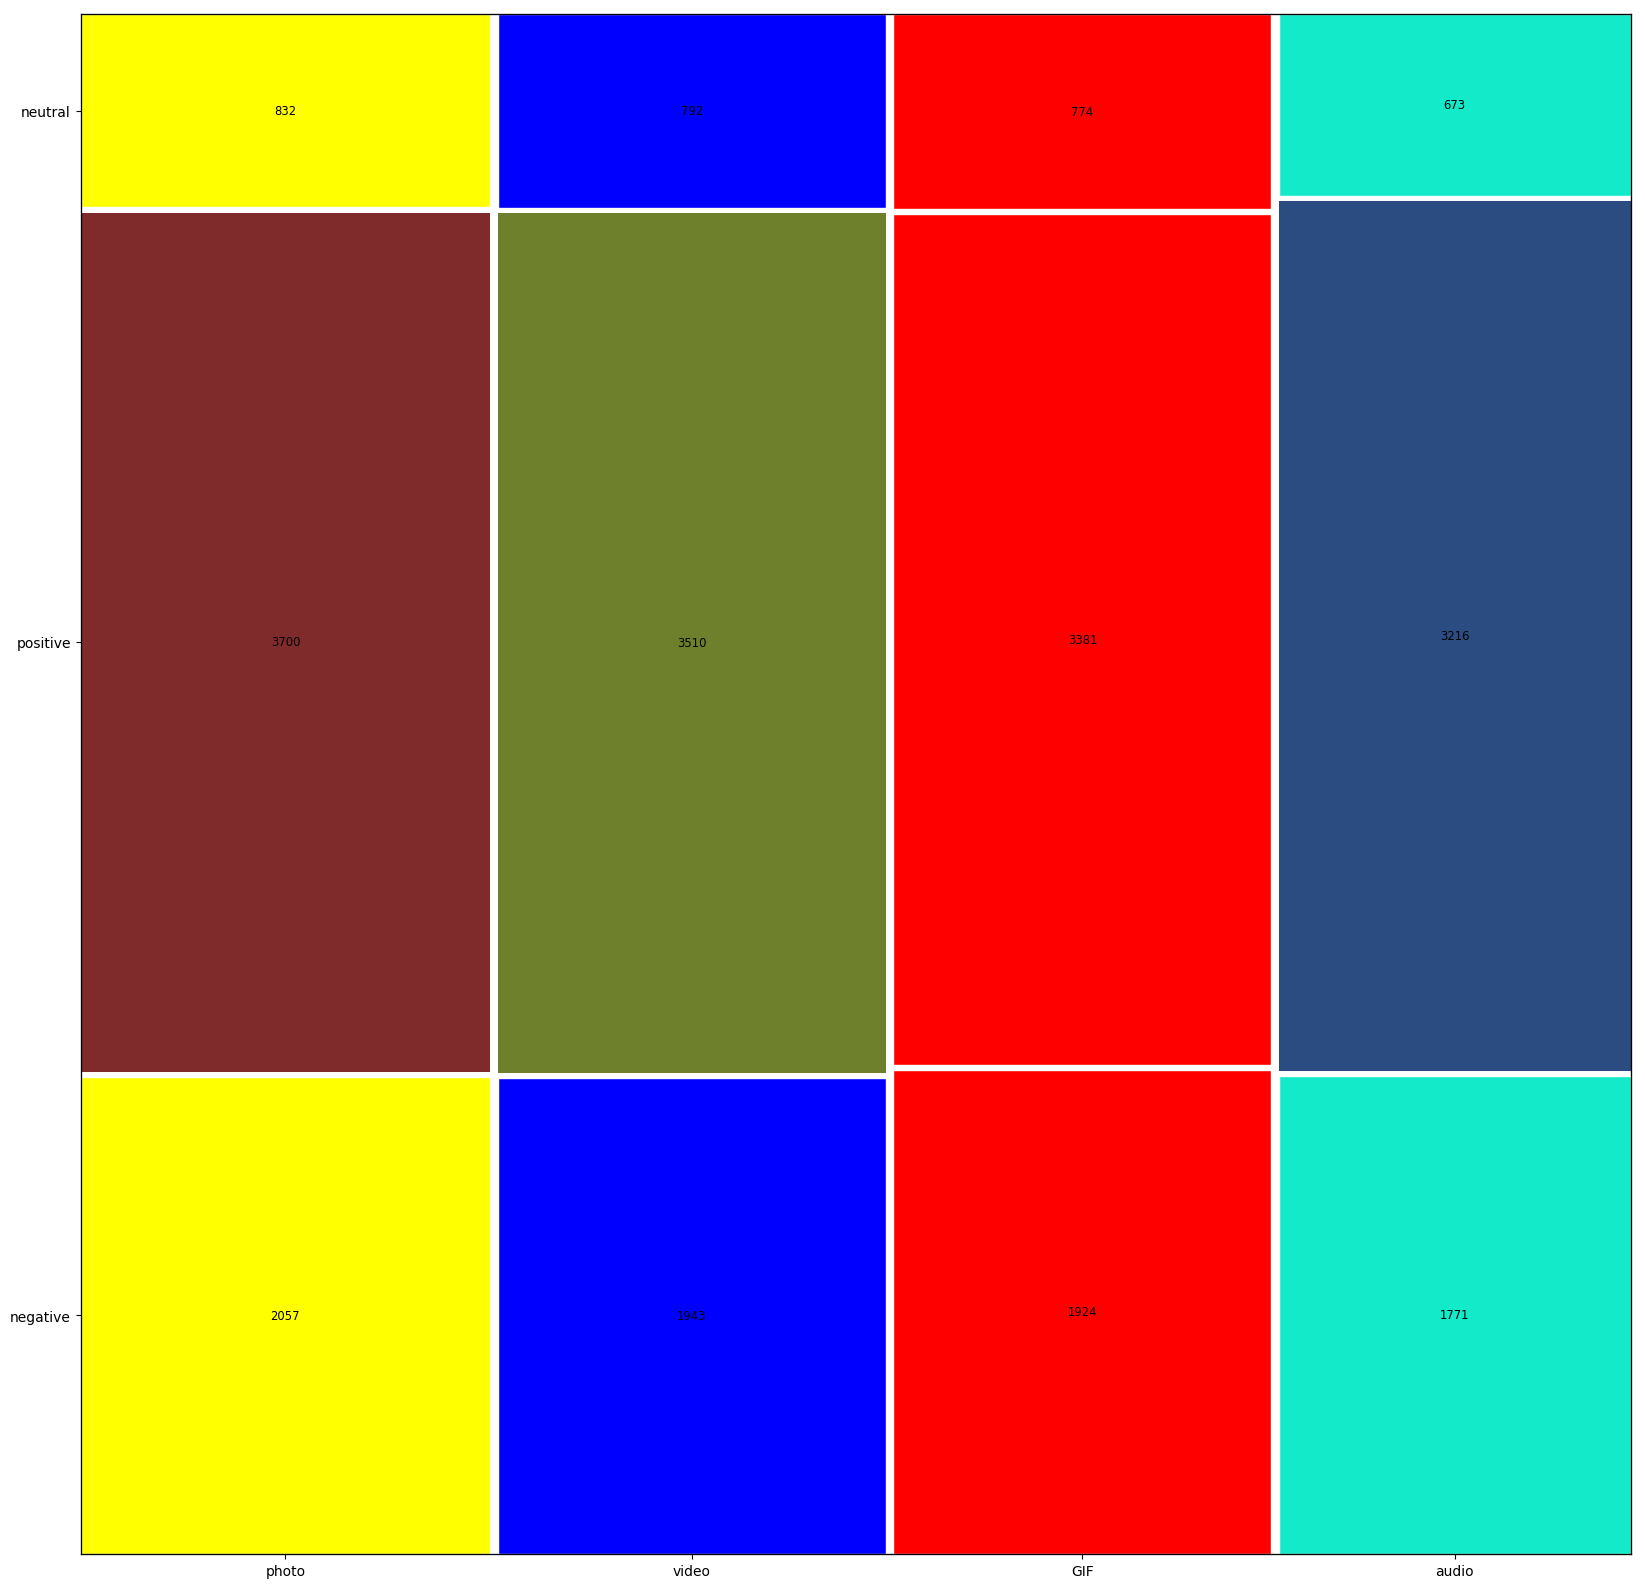

In [217]:
props={}
props[('GIF','negative')]={'facecolor':'red', 'edgecolor':'white'}
props[('GIF','neutral')]={'facecolor':'red', 'edgecolor':'white'}
props[('GIF','positive')]={'facecolor':'red', 'edgecolor':'white'}
props[('audio','negative')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('audio','neutral')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('audio','positve')]={'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('photo','negative')]={'facecolor':'yellow','edgecolor':'white'}
props[('photo','neutral')]={'facecolor':'yellow','edgecolor':'white'}
props[('photo','positve')]={'facecolor':'yellow','edgecolor':'white'}
props[('video','negative')]={'facecolor':'blue','edgecolor':'white'}
props[('video','neutral')]={'facecolor':'blue','edgecolor':'white'}
props[('video','positve')]={'facecolor':'blue','edgecolor':'white'}


labelizer=lambda k:{('GIF','negative'):1924,('audio','negative'):1771,('photo','negative'):2057,('video','negative'):1943,
                   ('GIF','neutral'):774,('audio','neutral'):673,('photo','neutral'):832,('video','neutral'):792,
                   ('GIF','positive'):3381,('audio','positive'):3216,('photo','positive'):3700,('video','positive'):3510}[k]
mosaic(finaldf,['content_type','Sentiment'],labelizer=labelizer,properties=props)
plt.show()